# Stochastic Process and Modeling Project
Project members are
1. Metawin Sumethiwit 633040173-4
2. Metee Yingyongwatthanakit 633040174-2

In [324]:
# import essential libraries
import scipy as sp
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint
sns.set_theme(style="whitegrid")

In [325]:
METEE_STUDENT_ID = 6_330_401_742
METAWIN_STUDENT_ID = 6_330_401_734
y1: int = METEE_STUDENT_ID % 1000
y2: int = METAWIN_STUDENT_ID % 1000
x0: int = y1 + y2

In [326]:
def get_nth_x(n: int) -> int:
	global x0
	if n == 0:
		return x0
	elif n >= 1:
		return (112 * get_nth_x(n - 1) % 111) + 2

In [327]:
# test if function works
x1: int = get_nth_x(1)
x2: int = get_nth_x(2)
x1, x2

(35, 37)

## 1 Simulation
Study binomial random event
i.i.d binomial~(N,p)

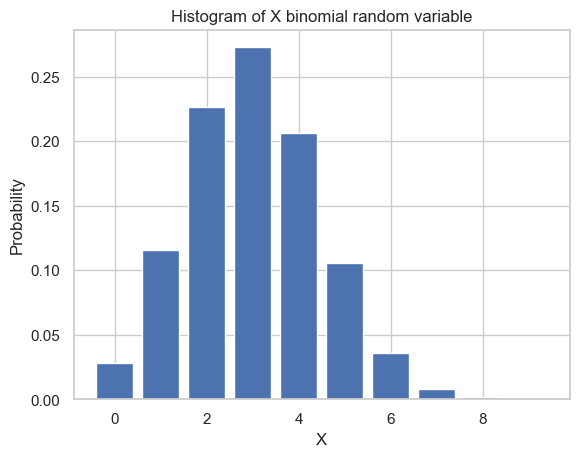

In [328]:
n = 10_000
p: float = 0.3
N = 10
X = stats.binom.rvs(N, p, size=n)
mean = np.mean(X)
variance = stats.variation(X)
pn = mean / N # estimate bernouli parameter p
# make step plot
plt.hist(X, bins=np.arange(0, N + 1) - 0.5, density=True, rwidth=0.8)
plt.title("Histogram of X binomial random variable")
# set x and y labels
plt.xlabel("X")
plt.ylabel("Probability")
plt.show()

In [329]:
print(f"Mean: {mean}")
print(f"Variance: {variance}")
print(f"Parameter p: {p}")
print(f"Estimated p: {pn}")

Mean: 3.0224
Variance: 0.4747505763050887
Parameter p: 0.3
Estimated p: 0.30224


### Now we change $$p = 0.31 + \frac{x_2}{1000}$$

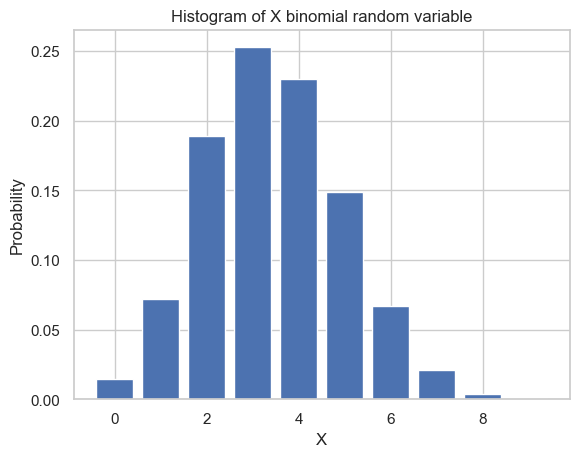

In [330]:
p: float = 0.31 + x2 / 1000
X = stats.binom.rvs(N, p, size=n)
mean = np.mean(X)
variance = stats.variation(X)
pn = mean / N # estimate bernouli parameter p
# make step plot
plt.hist(X, bins=np.arange(0, N + 1) - 0.5, density=True, rwidth=0.8)
plt.title("Histogram of X binomial random variable")
# set x and y labels
plt.xlabel("X")
plt.ylabel("Probability")
plt.show()

In [331]:
print(f"Mean: {mean}")
print(f"Variance: {variance}")
print(f"Parameter p: {p}")
print(f"Estimated p: {pn}")

Mean: 3.4587
Variance: 0.43675196621301243
Parameter p: 0.347
Estimated p: 0.34587


### We'll compare $p=0.3$ and $p=0.31+\frac{x_2}{1000}$ graphs together

X binomial(10, 0.3)
Mean: 2.9813
Variance: 0.48814877442972865
Parameter p: 0.3
Estimated p: 0.29813
----------------------------
X binomial(10, 0.347)
Mean: 3.4536
Variance: 0.4384645097059648
Parameter p: 0.347
Estimated p: 0.34536


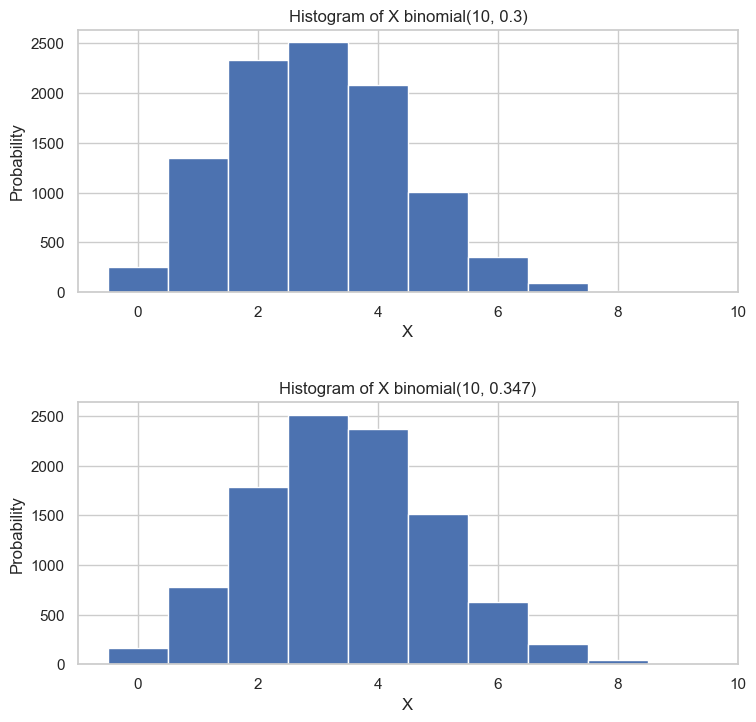

In [332]:
p: float = 0.3
X = stats.binom.rvs(N, p, size=n)
mean = np.mean(X)
variance = stats.variation(X)
pn = mean / N # estimate bernouli parameter p
# make step plot
fig, ax = plt.subplots(2)
fig.tight_layout(pad=2)
# set fig size
fig.set_size_inches(8, 8)
counts, bins = np.histogram(X, bins=np.arange(0, N + 1) - 0.5)
ax[0].hist(bins[:-1], bins, weights=counts)
# set x and y labels
ax[0].set_xlabel("X")
ax[0].set_ylabel("Probability")
# print statisticical values
print(f"X binomial({N}, {p})")
print(f"Mean: {mean}")
print(f"Variance: {variance}")
print(f"Parameter p: {p}")
print(f"Estimated p: {pn}")
print("----------------------------")
p2: float = 0.31 + x2 / 1000
X2 = stats.binom.rvs(N, p2, size=n)
mean2 = np.mean(X2)
variance2 = stats.variation(X2)
pn2 = mean2 / N # estimate bernouli parameter p
counts2, bins2 = np.histogram(X2, bins=np.arange(0, N + 1) - 0.5)
ax[1].hist(bins2[:-1], bins2, weights=counts2)
ax[1].set_title(f"Histogram of X binomial({N}, {p2})")
# set x and y labels
ax[1].set_xlabel("X")
ax[1].set_ylabel("Probability")

# set titles
ax[1].set_title(f"Histogram of X binomial({N}, {p2})")
ax[0].set_title(f"Histogram of X binomial({N}, {p})")

# print statisticical values
print(f"X binomial({N}, {p2})")
print(f"Mean: {mean2}")
print(f"Variance: {variance2}")
print(f"Parameter p: {p2}")
print(f"Estimated p: {pn2}")

# 2 Validate whether Binomail~(N, pn) is a good fit to the data, X

In [333]:
# np.array of binomial random variable; X2 Binomial~(N,pn) from previous analysis
X2

array([5, 5, 3, ..., 1, 2, 3])

In [334]:
middle2 = (bins2[1:] + bins2[:-1]) / 2
counts2

array([ 160,  774, 1786, 2515, 2370, 1516,  629,  199,   42,    8])

In [335]:
H_data = n * stats.binom.pmf(np.arange(10), N, p2)
H_data

array([ 140.97165967,  749.11433239, 1791.33542117, 2538.41098988,
       2360.56672834, 1505.26797195,  666.57476553,  202.40773891,
         40.33431397,    4.76297667])

In [336]:
# compute a statistic Z
Z: float = np.sum(np.power((counts2 - H_data), 2) / (H_data))
Z

8.185363799545545

In [337]:
# calculate Z_alp choose alpha = 0.05
k: int = 1
Z_alp: float = stats.chi2.ppf(0.95, N - 1 - k)
Z_alp

15.50731305586545

In [338]:
# chi square test
if Z < Z_alp:
	print("H0 is accepted")
else:
	print("H0 is rejected")

H0 is accepted
